In [1]:
import os

from PIL import Image
import matplotlib.pyplot as plt

from xrkit.base import CONFIG
from xrkit.models import *
from xrkit.data.dataset import RSUASegmentationDataset

from torch.utils.data import DataLoader

import pytorch_lightning as L

os.chdir("..")

In [ ]:
def plot_images_predictions(model, images, device="cuda"):
    inputs, targets = images
    inputs, targets = inputs.to(device), targets.numpy()
    outputs, targets = model((inputs, targets))
    outputs = outputs.detach().cpu().numpy()

    for index in range(4):
        image1 = Image.fromarray(images[0][index].numpy()[0] * 255)
        image2 = Image.fromarray((targets[index][0] * 255))
        image3 = Image.fromarray((outputs[index][0] * 255))

        _, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(image1)
        axes[0].set_title("Original")

        axes[1].imshow(image2)
        axes[1].set_title("Mask")

        axes[2].imshow(image3)
        axes[2].set_title("DNN")

        for axis in axes:
            axis.axis("off")

        plt.tight_layout()
        plt.show()

In [2]:
test_dataset = RSUASegmentationDataset("test")
test_loader = DataLoader(
    test_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

In [3]:
device = "cuda"
test_images = next(iter(test_loader))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/yullhan/miniconda3/envs/nih/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


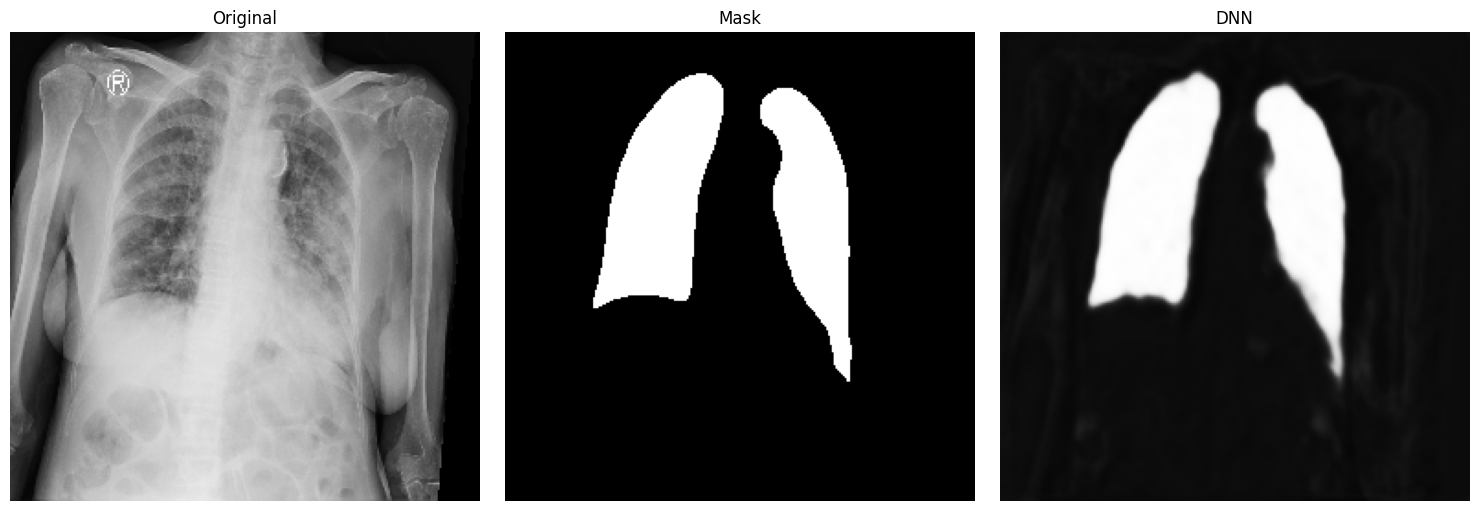

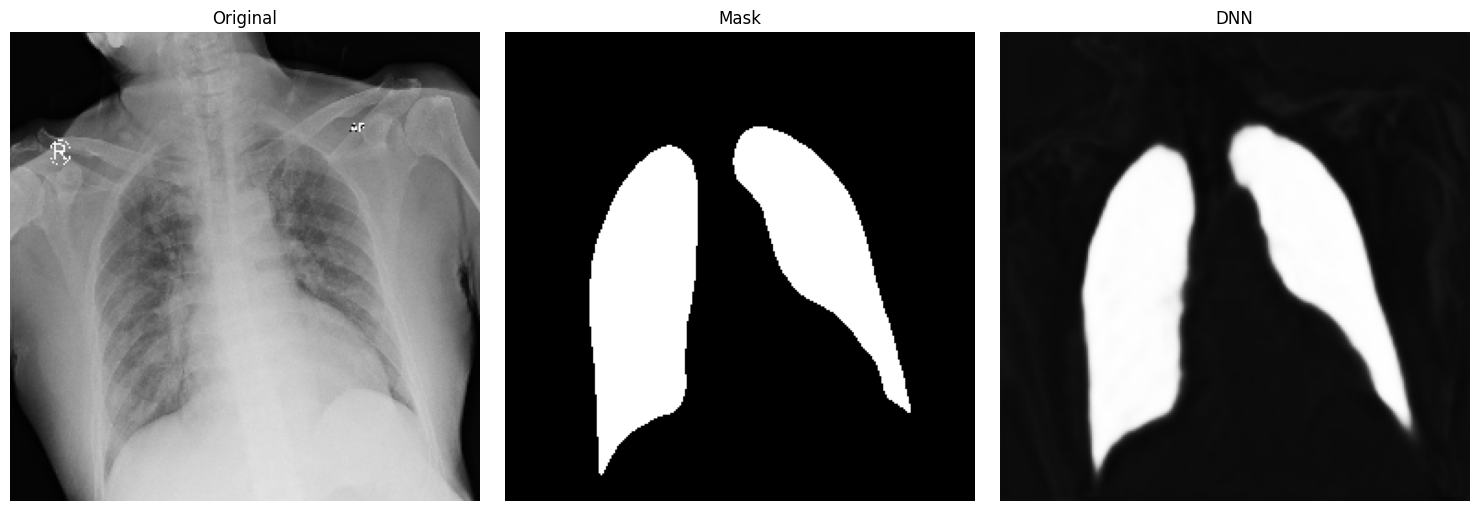

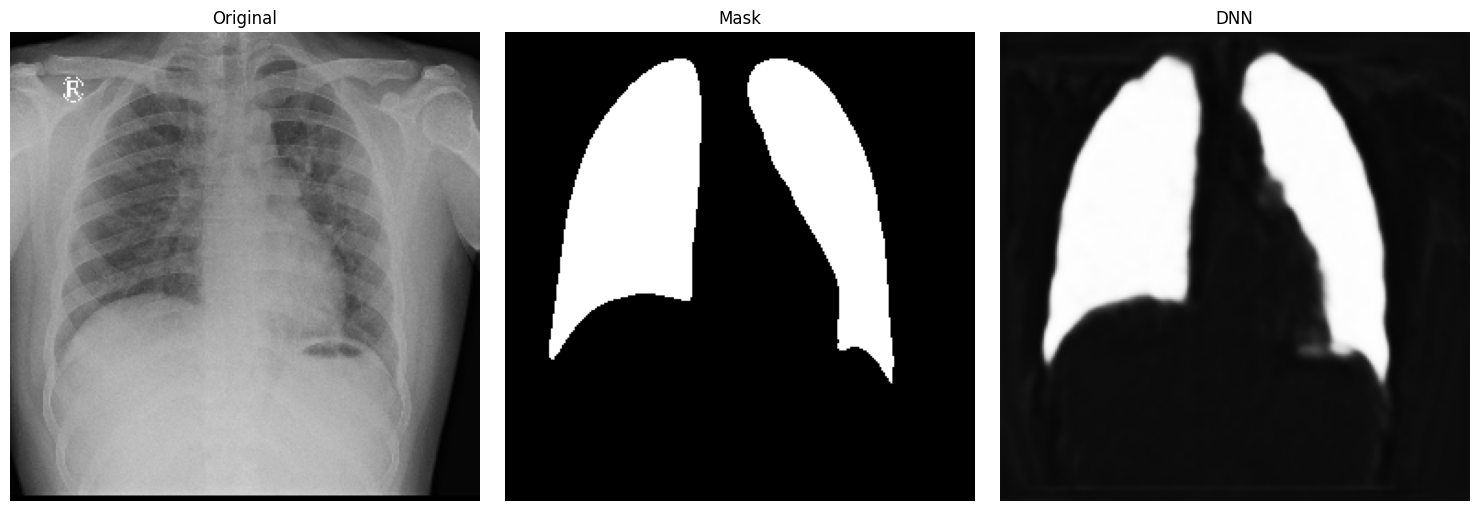

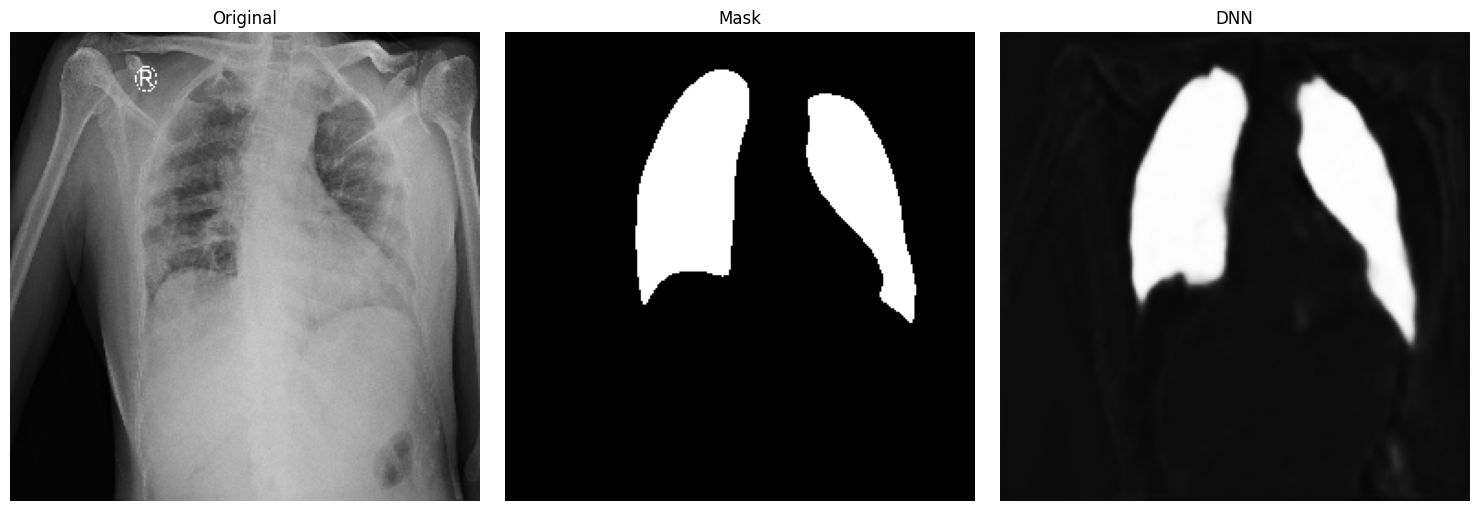

In [5]:
checkpoint_path = (
    "/home/yullhan/Projects/NIH-ChestXRay/models/mobilenetv2unet/model-epoch=002-validation_dice=0.85.ckpt"
)
trainer = L.Trainer()
model = MobileNetV2UNetModel.load_from_checkpoint(checkpoint_path=checkpoint_path).to(device)
model.eval()

plot_images_predictions(model, test_images, device)